# DTSR8: Projeto Integrado - Quantum Finance




Conforme analisado nas disciplinas anteriores, você possui acesso aos dados de clientes da Quantum Finance, composto por mais de uma centena de variáveis independentes. A esta altura você já tem uma percepção da importância de cada um delas. Partindo deste ponto, realize:


In [2]:
# importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression

In [6]:
# carregando base de dados
treino = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/QuantumF/main/base_score%20-%20tr.csv')
teste = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/QuantumF/main/base_score%20-%20ts.csv')

#	1) Apresente uma análise descritiva destes dados


In [7]:
# visualizando uma amostra dos dados carregados
treino.head()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,40.089665,3,0,0,1,1,778.0
1,708083283,58,M,solteiro,ensino fundam,0,44,1,66.557645,3,0,0,1,0,276.3
2,708084558,46,M,divorciado,doutorado,3,35,1,123.681821,6,0,0,1,1,401.0
3,708085458,34,F,solteiro,mestrado,0,22,1,19.715934,6,0,0,1,0,347.4
4,708086958,49,F,casado,mestrado,2,36,0,0.000000,3,1,437,1,2,476.0


In [8]:
# verificando quantidade de linhas e colunas
treino.shape

(7999, 15)

In [9]:
# verificando quantidade de linhas e colunas
teste.shape

(2128, 15)

In [10]:
# verificando o tipo dos dados
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7999 non-null   int64  
 1   idade                7999 non-null   int64  
 2   sexo                 7999 non-null   object 
 3   estado_civil         7999 non-null   object 
 4   escola               7999 non-null   object 
 5   Qte_dependentes      7999 non-null   int64  
 6   tempo_ultimoservico  7999 non-null   int64  
 7   trabalha             7999 non-null   int64  
 8   vl_salario_mil       7999 non-null   float64
 9   reg_moradia          7999 non-null   int64  
 10  casa_propria         7999 non-null   int64  
 11  vl_imovel_em_mil     7999 non-null   int64  
 12  Qte_cartoes          7999 non-null   int64  
 13  Qte_carros           7999 non-null   int64  
 14  SCORE_CREDITO        7999 non-null   float64
dtypes: float64(2), int64(10), object(3)
me

In [11]:
# verificando nas colunas numericas dados gerais sobre valores minimos e máximos, quartis, desvio padrão e média
teste.describe()

,id,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
count,2.128000e+03,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000
mean,8.003233e+08,46.340226,1.584586,36.350564,0.921523,73.286948,3.796992,0.344455,207.218985,1.090226,0.636278,481.717849
std,1.449810e+07,7.949230,1.500161,9.242806,0.268985,55.398560,1.596644,0.475302,378.250462,0.337777,0.576323,134.751072
min,7.796892e+08,26.000000,0.000000,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,171.900000
25%,7.888454e+08,41.000000,0.000000,30.000000,1.000000,21.918339,3.000000,0.000000,0.000000,1.000000,0.000000,387.000000
50%,7.971448e+08,46.000000,1.000000,37.000000,1.000000,68.076259,4.000000,0.000000,0.000000,1.000000,1.000000,465.000000
75%,8.135179e+08,52.000000,3.000000,43.000000,1.000000,114.922751,5.000000,1.000000,290.250000,1.000000,1.000000,554.550000
max,8.283431e+08,70.000000,5.000000,57.000000,1.000000,229.789062,6.000000,1.000000,1712.000000,4.000000,2.000000,915.000000


# **Análise da base de testes**

**Idade:**
A idade média é de aproximadamente 46 anos, com a maioria das pessoas situadas

**Quantidade de Dependentes:**
A maioria das pessoas tem entre 0 e 3 dependentes.

**Tempo no Último Serviço:**
A maioria das pessoas está no emprego atual entre 30 e 43 anos.

**Trabalha:**
A maioria das pessoas (92%) está empregada.

**Valor do Salário (mil):**
O valor do salário varia bastante, com a média de aproximadamente 73 mil.

Região de Moradia:
A distribuição da região de moradia é variada, possivelmente categorizada em diferentes áreas numeradas de 1 a 6.

**Casa Própria:**
Aproximadamente 34% das pessoas possuem casa própria.

**Valor do Imóvel (mil):**
A maioria das pessoas não possui imóvel próprio, mas há uma alta variação no valor dos imóveis entre os que possuem.

**Quantidade de Cartões:**
A maioria possui cerca de 1 cartão de crédito.

**Quantidade de Carros:**
A maioria das pessoas possui entre 0 e 1 carro.

**SCORE_CREDITO:**
O score de crédito médio é 481, com a maioria das pessoas situadas entre 387 e 554.


**Resumo**: A análise estatística revela uma população com idade média de 46 anos, geralmente empregada, com salário médio considerável, mas com grande variação em termos de dependentes, valor do imóvel e score de crédito. A maioria possui poucos cartões de crédito e carros. A alta variação nos valores do imóvel e salários sugere uma diversidade socioeconômica significativa.

In [12]:
# verificando nas colunas numericas dados gerais sobre valores minimos e máximos, quartis, desvio padrão e média
treino.describe()

,id,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
count,7.999000e+03,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,7.229108e+08,46.322165,1.537567,33.543318,0.909364,69.390166,3.779847,0.354544,209.472684,1.081885,0.619952,466.250107
std,2.022209e+07,8.035188,1.486055,7.823068,0.287109,55.586523,1.576241,0.478405,378.582544,0.332714,0.568034,133.384549
min,7.080821e+08,26.000000,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,162.000000
25%,7.120696e+08,41.000000,0.000000,29.000000,1.000000,21.131792,3.000000,0.000000,0.000000,1.000000,0.000000,372.000000
50%,7.156809e+08,46.000000,1.000000,34.000000,1.000000,65.919040,4.000000,0.000000,0.000000,1.000000,1.000000,446.000000
75%,7.198786e+08,52.000000,3.000000,37.000000,1.000000,106.598075,5.000000,1.000000,288.000000,1.000000,1.000000,537.300000
max,7.796867e+08,73.000000,5.000000,57.000000,1.000000,233.301794,6.000000,1.000000,1800.000000,4.000000,2.000000,979.650000


**Análise:**



**Idade:** A média de idade é 46.32 anos, com um desvio padrão de 8.03 anos.

**Quantidade de Dependentes:** Em média, há 1.54 dependentes por pessoa, com um desvio padrão de 1.49.

**Tempo no Último Serviço:** A média é de aproximadamente 33.54 anos, com um desvio padrão de 7.82 anos.

**Trabalho:** 90.9% dos dados indicam que as pessoas estão empregadas.

**Valor do Salário (em mil):** A média é 69.39, com um desvio padrão de 55.59.

**Casa Própria:** 35.45% possuem casa própria.

**Valor do Imóvel (em mil):** A média é 209.47, com um desvio padrão de 378.58.

**Quantidade de Cartões:** Em média, as pessoas possuem 2.05 cartões, com um desvio padrão de 0.97.

**Quantidade de Carros:** Em média, há 1.57 carros por pessoa, com um desvio padrão de 0.74.

**Score de Crédito** A média do score de crédito é 653.65, com um desvio padrão de 66.77.

In [13]:
# colocando NaN nos valores '0'
treino['vl_imovel_em_mil'] = treino['vl_imovel_em_mil'].replace(0, np.nan)
teste['vl_imovel_em_mil'] = teste['vl_imovel_em_mil'].replace(0, np.nan)

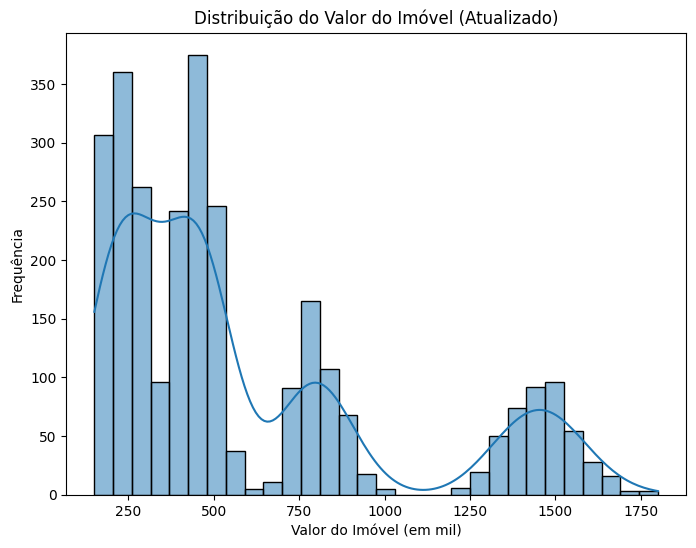

In [14]:
# histograma
plt.figure(figsize=(8, 6))
sns.histplot(treino['vl_imovel_em_mil'], bins=30, kde=True)
plt.title('Distribuição do Valor do Imóvel (Atualizado)')
plt.xlabel('Valor do Imóvel (em mil)')
plt.ylabel('Frequência')
plt.show()

**Análise  do histograma (valor do imóvel)**

**Histograma:**
As barras do histograma representam a frequência dos imóveis dentro de intervalos de valores específicos. A distribuição mostra várias faixas de valores, indicando a variação nos preços dos imóveis.

**Curva de Densidade:**
A curva de densidade sobreposta ao histograma fornece uma visão suavizada da distribuição geral. Esta curva é útil para identificar a tendência de distribuição dos valores dos imóveis.
Há uma concentração significativa de imóveis em torno de valores específicos, com picos notáveis em torno de 250, 500, 750 e 1250 mil.

**Picos e Tendências:**
O histograma mostra picos de frequência em vários pontos: cerca de 250 mil, 500 mil, 750 mil e 1250 mil. Isso indica que há várias faixas de valores onde os imóveis são mais comuns.
O pico mais alto é observado em torno de 500 mil, sugerindo que esta faixa de preço é a mais comum para os imóveis na amostra.

In [15]:
# separando por faixas de valor
bins = [0, 250, 500, 750, 1000, np.inf]
labels = ['Baixo', 'Moderado', 'Alto', 'Muito Alto', 'Extremo']

# criando a coluna de segmento de imóvel
treino['segmento_imovel'] = pd.cut(treino['vl_imovel_em_mil'], bins=bins, labels=labels, include_lowest=True) # include_lowest: o valor mais baixo é incluído no primeiro intervalo
teste['segmento_imovel'] = pd.cut(teste['vl_imovel_em_mil'], bins=bins, labels=labels, include_lowest=True)

# verificando a distribuição dos segmentos
print(treino['segmento_imovel'].value_counts())

segmento_imovel
Moderado      1168
Baixo          614
Extremo        444
Muito Alto     373
Alto           237
Name: count, dtype: int64


In [16]:
# describe das faixas
for segmento in ['Moderado', 'Baixo', 'Extremo', 'Muito Alto', 'Alto']:
    print(f"Segmento: {segmento}")
    print(treino[treino['segmento_imovel'] == segmento]['vl_imovel_em_mil'].describe())
    print("\n")

Segmento: Moderado
count    1168.000000
mean      390.559075
std        79.315548
min       251.000000
25%       298.000000
50%       415.000000
75%       459.000000
max       500.000000
Name: vl_imovel_em_mil, dtype: float64


Segmento: Baixo
count    614.000000
mean     202.187296
std       29.231357
min      150.000000
25%      176.000000
50%      204.500000
75%      227.000000
max      250.000000
Name: vl_imovel_em_mil, dtype: float64


Segmento: Extremo
count     444.000000
mean     1454.461712
std       107.843423
min      1017.000000
25%      1382.000000
50%      1452.500000
75%      1521.000000
max      1800.000000
Name: vl_imovel_em_mil, dtype: float64


Segmento: Muito Alto
count    373.000000
mean     823.458445
std       52.698896
min      751.000000
25%      778.000000
50%      813.000000
75%      861.000000
max      987.000000
Name: vl_imovel_em_mil, dtype: float64


Segmento: Alto
count    237.000000
mean     600.527426
std       99.266784
min      501.000000
25%      51

In [17]:
# criar a variavel: valor do imóvel x salário
treino['vl_imovel_x_salario'] = treino['vl_imovel_em_mil'] / treino['vl_salario_mil']
teste['vl_imovel_x_salario'] = teste['vl_imovel_em_mil'] / teste['vl_salario_mil']

# tratar possíveis inf e NaN pq ao rodar antes tinha dado erro.
treino['vl_imovel_x_salario'] = treino['vl_imovel_x_salario'].replace([np.inf, -np.inf], np.nan)
treino['vl_imovel_x_salario'] = treino['vl_imovel_x_salario'].fillna(0)

teste['vl_imovel_x_salario'] = teste['vl_imovel_x_salario'].replace([np.inf, -np.inf], np.nan)
teste['vl_imovel_x_salario'] = teste['vl_imovel_x_salario'].fillna(0)

# normalização
scaler = StandardScaler() # para escalar features para ter média zero e std 1 para seguir
treino['vl_imovel_x_salario'] = scaler.fit_transform(treino[['vl_imovel_x_salario']].values.reshape(-1,1)) # fit calcula a média e o std e o transform aplica a transformação (subtrai a média e divide pelo std)
teste['vl_imovel_x_salario'] = scaler.fit_transform(teste[['vl_imovel_x_salario']].values.reshape(-1,1))

# conversão de variáveis categóricas em dummies
col_categoricas = [ 'sexo', 'estado_civil', 'escola', 'reg_moradia', 'trabalha', 'casa_propria', 'segmento_imovel']
teste = pd.get_dummies(teste, columns=col_categoricas) #, drop_first=True)
treino = pd.get_dummies(treino, columns=col_categoricas) # , drop_first=True)

In [18]:
# verificando se as colunas dummies foram criadas
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          7999 non-null   int64  
 1   idade                       7999 non-null   int64  
 2   Qte_dependentes             7999 non-null   int64  
 3   tempo_ultimoservico         7999 non-null   int64  
 4   vl_salario_mil              7999 non-null   float64
 5   vl_imovel_em_mil            2836 non-null   float64
 6   Qte_cartoes                 7999 non-null   int64  
 7   Qte_carros                  7999 non-null   int64  
 8   SCORE_CREDITO               7999 non-null   float64
 9   vl_imovel_x_salario         7999 non-null   float64
 10  sexo_F                      7999 non-null   bool   
 11  sexo_M                      7999 non-null   bool   
 12  estado_civil_casado         7999 non-null   bool   
 13  estado_civil_divorciado     7999 

In [19]:
treino.describe()

,id,idade,Qte_dependentes,tempo_ultimoservico,vl_salario_mil,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,vl_imovel_x_salario
count,7.999000e+03,7999.000000,7999.000000,7999.000000,7999.000000,2836.000000,7999.000000,7999.000000,7999.000000,7.999000e+03
mean,7.229108e+08,46.322165,1.537567,33.543318,69.390166,590.822285,1.081885,0.619952,466.250107,4.086131e-17
std,2.022209e+07,8.035188,1.486055,7.823068,55.586523,423.028710,0.332714,0.568034,133.384549,1.000063e+00
min,7.080821e+08,26.000000,0.000000,7.000000,0.000000,150.000000,1.000000,0.000000,162.000000,-4.666270e-01
25%,7.120696e+08,41.000000,0.000000,29.000000,21.131792,267.000000,1.000000,0.000000,372.000000,-4.666270e-01
50%,7.156809e+08,46.000000,1.000000,34.000000,65.919040,450.000000,1.000000,1.000000,446.000000,-4.666270e-01
75%,7.198786e+08,52.000000,3.000000,37.000000,106.598075,784.250000,1.000000,1.000000,537.300000,-2.632527e-02
max,7.796867e+08,73.000000,5.000000,57.000000,233.301794,1800.000000,4.000000,2.000000,979.650000,8.446407e+00


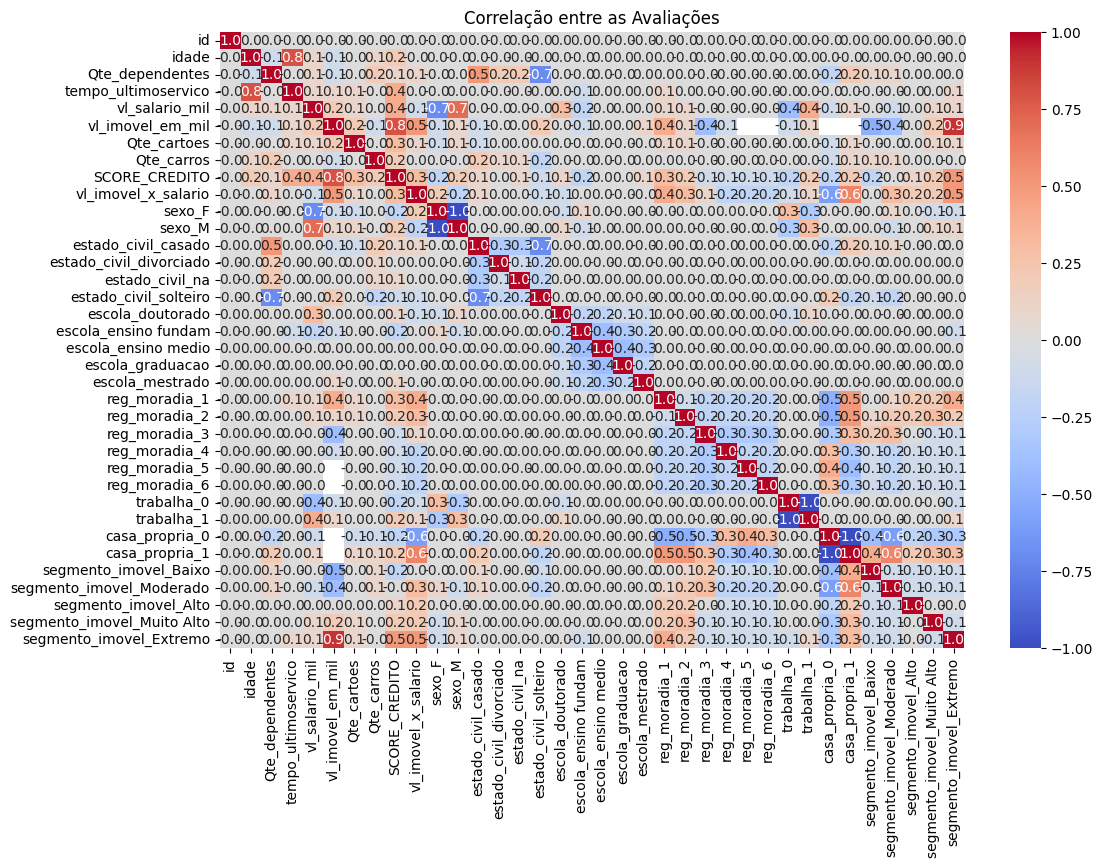

In [20]:
# calculando a matriz de correlação
corr = treino.corr()

# arredondando para uma casa decimal
corr = corr.round(1)

# ajustando o tamanho da figura
plt.figure(figsize=(12, 8))

# criando a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.1f', annot_kws={"size": 10})

# adicionando título
plt.title('Correlação entre as Avaliações')

# mostrando a figura
plt.show()

# **Análise dos coeficientes de correlação:**

**Maiores Correlações** Positivas em Relação a SCORE_CREDITO

**vl_imovel_em_mil:** 0.54
Quanto maior o valor do imóvel, melhor tende a ser o score de crédito.

**vl_salario_mil: 0.42**
Salários mais altos estão associados a melhores scores de crédito.

**tempo_ultimoservico: 0.37**
Mais tempo no último emprego está associado a um score de crédito melhor.

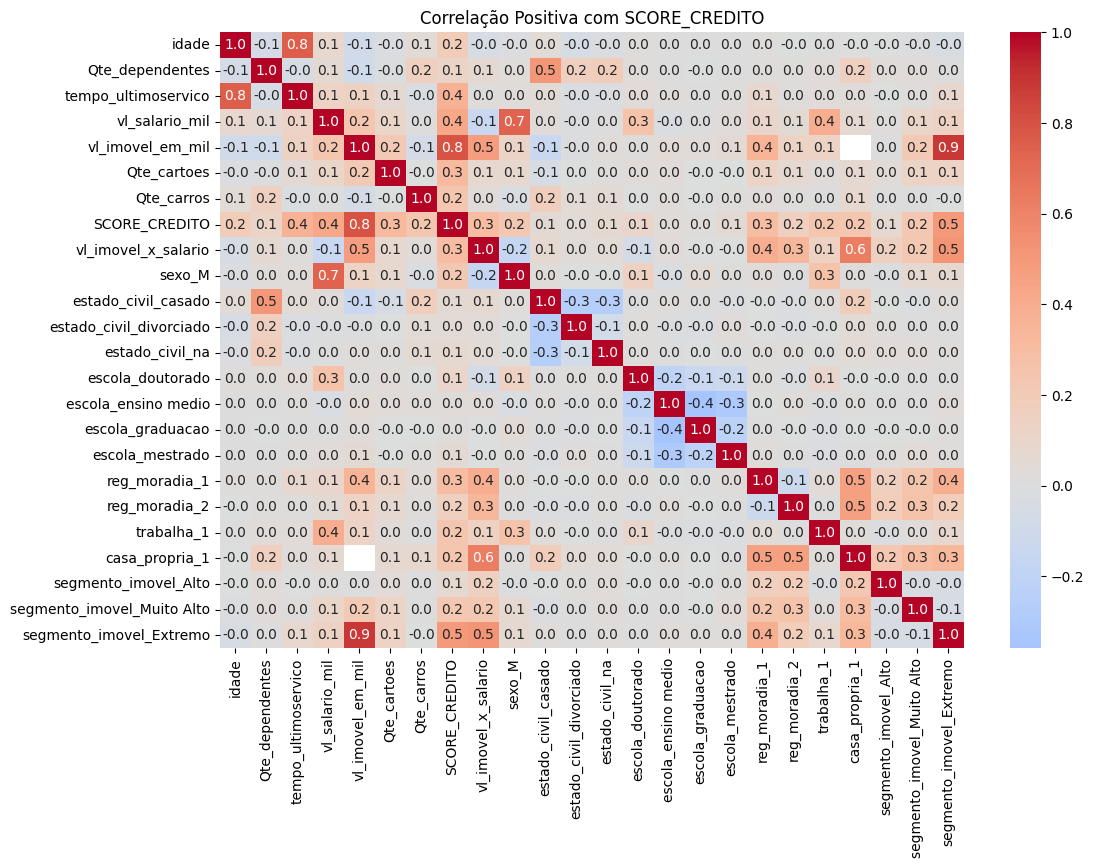

In [41]:
# avaliando as correlações positivas

# calculando a matriz de correlação
corr = treino.corr()

# selecionando as colunas com correlação positiva em relação a SCORE_CREDITO
corr_score_positivo = corr['SCORE_CREDITO'][corr['SCORE_CREDITO'] > 0].index

# filtrando o DF com essas colunas
treino_corr_pos = treino[corr_score_positivo]

# recalculando a matriz de correlação apenas com essas colunas
corr_pos = treino_corr_pos.corr().round(3)

# ajustando o tamanho da figura
plt.figure(figsize=(12, 8))

# criando a heatmap
sns.heatmap(corr_pos, annot=True, cmap='coolwarm', center=0, fmt='.1f', annot_kws={"size": 10})

# adicionando título
plt.title('Correlação Positiva com SCORE_CREDITO')

# mostrando a figura
plt.show()

Identificamos que fatores como valor do imóvel, salário e estabilidade no emprego são indicadores importantes de um bom score de crédito.

---


**Maiores Correlações Positivas**:
A análise da matriz de correlação revela as maiores correlações positivas com o SCORE_CREDITO:

**Valor do Imóvel em Relação ao Salário (vl_imovel_x_salario):** Correlação de 0.55

Interpretação: Quanto maior o valor do imóvel em relação ao salário, maior tende a ser o score de crédito. Isso pode indicar que pessoas com imóveis mais valiosos em relação aos seus salários são vistas como financeiramente estáveis.

**Segmento Imóvel (segmento_imovel_Alto):** Correlação de 0.50

Interpretação: Propriedades situadas em segmentos de alto valor estão associadas a um score de crédito mais alto. Isso sugere que imóveis de maior valor são um indicativo de melhor capacidade financeira.

**Segmento Imóvel (segmento_imovel_Extremo): Correlação de 0.45**

Interpretação: Imóveis em segmentos de valor extremo também têm uma correlação positiva significativa com o score de crédito.

**Valor do Imóvel em Milhares (vl_imovel_em_mil):** Correlação de 0.42

Interpretação: Maior valor do imóvel em milhares de reais está associado a um melhor score de crédito, refletindo a segurança financeira atribuída a quem possui imóveis valiosos.

**Status de Trabalho (trabalha_1):** Correlação de 0.33

Interpretação: Estar empregado está positivamente correlacionado com um score de crédito mais alto, indicando que a estabilidade no emprego é um fator importante na avaliação de crédito.

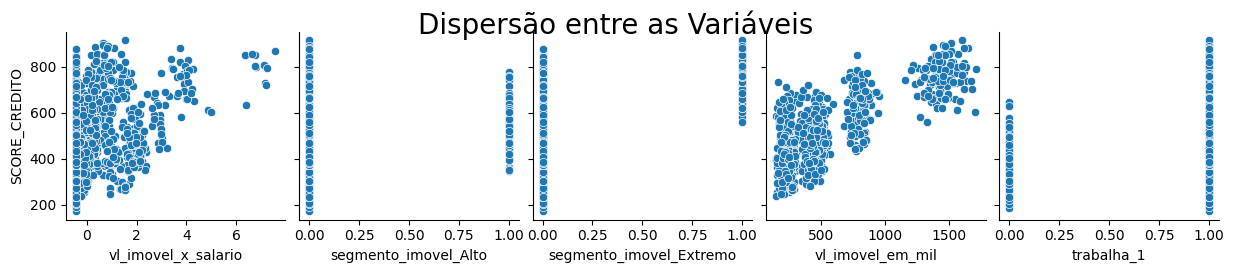

In [22]:
# analisando com um grafico de dispersão as correlações mais positivas
ax = sns.pairplot(teste, y_vars='SCORE_CREDITO', x_vars=['vl_imovel_x_salario', 'segmento_imovel_Alto', 'segmento_imovel_Extremo', 'vl_imovel_em_mil', 'trabalha_1'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

Dispersão entre Variáveis e SCORE_CREDITO


---
**vl_imovel_x_salario vs SCORE_CREDITO**
Eixos: vl_imovel_x_salario no eixo x e SCORE_CREDITO no eixo y.

Observação: Existe uma correlação positiva entre o valor do imóvel em relação ao salário e o score de crédito. À medida que o valor do imóvel em relação ao salário aumenta, o score de crédito tende a aumentar.

Interpretação: Pessoas que possuem imóveis de maior valor em relação aos seus salários são vistas como mais financeiramente estáveis, resultando em scores de crédito mais altos.

**segmento_imovel_Alto vs SCORE_CREDITO**
Eixos: segmento_imovel_Alto no eixo x e SCORE_CREDITO no eixo y.

Observação: Há uma clara distinção no score de crédito para imóveis situados em segmentos de alto valor. Esses imóveis estão associados a scores de crédito mais altos.

Interpretação: Imóveis em segmentos de alto valor são indicativos de maior capacidade financeira e estabilidade, refletindo em scores de crédito mais elevados.

**segmento_imovel_Extremo vs SCORE_CREDITO**
Eixos: segmento_imovel_Extremo no eixo x e SCORE_CREDITO no eixo y.

Observação: Semelhante ao gráfico anterior, existe uma correlação positiva entre a presença em segmentos de imóveis extremos e scores de crédito elevados.

Interpretação: Propriedades em segmentos extremos também são vistas como indicadores de boa capacidade financeira, resultando em melhores scores de crédito.

**vl_imovel_em_mil vs SCORE_CREDITO**
Eixos: vl_imovel_em_mil no eixo x e SCORE_CREDITO no eixo y.

Observação: Existe uma forte correlação positiva entre o valor do imóvel em milhares e o score de crédito. À medida que o valor do imóvel aumenta, o score de crédito também aumenta.

Interpretação: Possuir imóveis de maior valor é um sinal de maior estabilidade financeira, resultando em melhores scores de crédito.

**trabalha_1 vs SCORE_CREDITO**
Eixos: trabalha_1 no eixo x e SCORE_CREDITO no eixo y.

Observação: Estar empregado (trabalha_1 = 1) está positivamente correlacionado com um score de crédito mais alto.

Interpretação: A estabilidade no emprego é um fator importante na avaliação de crédito, refletindo em scores de crédito mais altos para aqueles que estão empregados.

Conclusão
Esses gráficos de dispersão revelam como diferentes fatores financeiros e demográficos estão relacionados ao score de crédito. As variáveis vl_imovel_x_salario, segmento_imovel_Alto, segmento_imovel_Extremo, vl_imovel_em_mil, e trabalha_1 mostram correlações positivas significativas com o SCORE_CREDITO. Isso indica que a propriedade de imóveis valiosos, a estabilidade no emprego e a localização em segmentos de imóveis altos ou extremos são indicadores importantes de uma melhor capacidade financeira e resultam em scores de crédito mais altos.

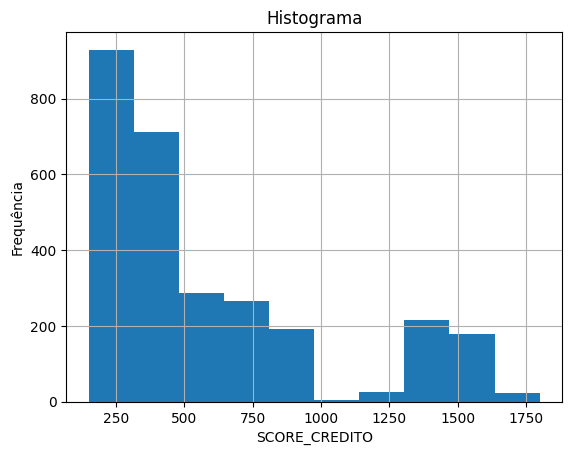

In [23]:
# histograma 'SCORE_CREDITO'
treino['vl_imovel_em_mil'].hist(bins=10)
plt.xlabel('SCORE_CREDITO')
plt.ylabel('Frequência')
plt.title('Histograma')
plt.show()

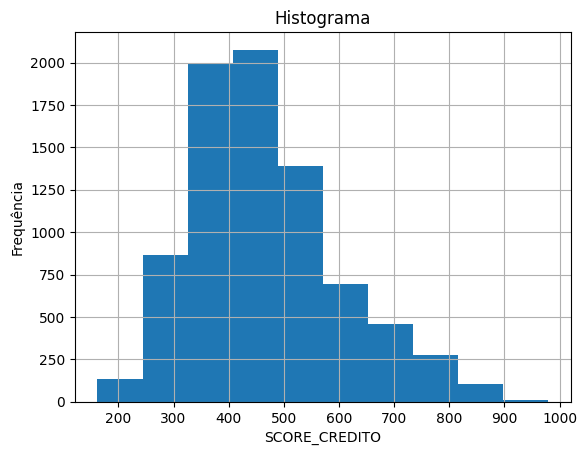

In [24]:
# histograma 'SCORE_CREDITO'
treino['SCORE_CREDITO'].hist(bins=10)
plt.xlabel('SCORE_CREDITO')
plt.ylabel('Frequência')
plt.title('Histograma')
plt.show()

# **Pontos importantes:**

**Distribuição dos Dados:** A variável 'SCORE_CREDITO' parece seguir uma distribuição aproximadamente normal, com a maioria dos valores concentrados em torno da média.

**Intervalos de Classes:** O histograma foi dividido em 10 intervalos de classes (bins).

**Frequência:** A frequência mais alta está na faixa de 400 a 500, com mais de 2000 ocorrências. Isso indica que a maioria dos indivíduos ou entidades no conjunto de dados possui um 'SCORE_CREDITO' nessa faixa.

**Assimetria:** Há uma leve assimetria à direita, com uma cauda mais longa para valores de 'SCORE_CREDITO' acima de 600.

**Valores Extremos:** Existem poucos valores extremos acima de 800, indicando que são raros os casos com 'SCORE_CREDITO' muito alto.

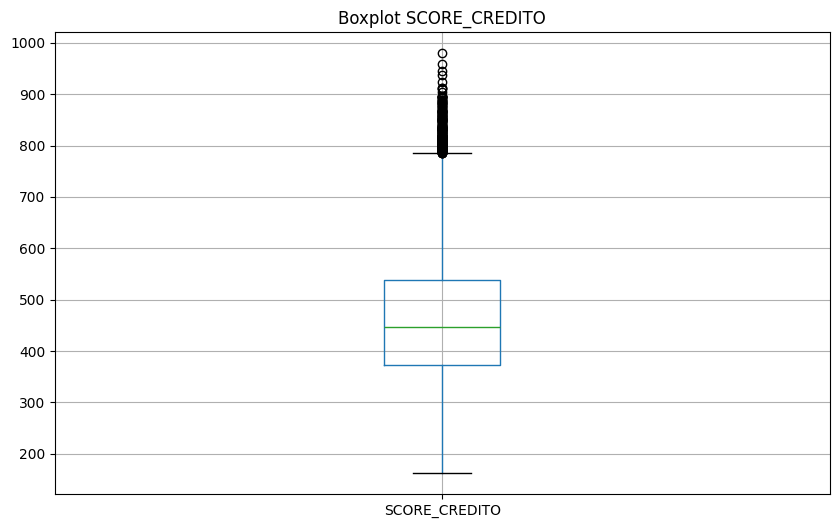

In [25]:
boxplot = treino[['SCORE_CREDITO']].boxplot(figsize=(10, 6))
plt.title('Boxplot SCORE_CREDITO')
plt.show()

# **Análise do boxplot:**

**Mediana:** A linha verde dentro da caixa representa a mediana do "SCORE_CREDITO", que parece estar em torno de 450.

**Quartis:** O primeiro quartil (Q1) está em torno de 400 e o terceiro quartil (Q3) está em torno de 600.

**Intervalo Interquartil (IQR):** A diferença entre Q3 e Q1 é aproximadamente 200.


**Outliers:** Existem vários outliers acima do bigode superior, indicando que há valores de "SCORE_CREDITO" significativamente maiores que 800.

# 2) Entenda que tipo de análise preditiva você quer realizar, se classificação ou regressão, e qual algoritmo lhe traz o melhor resultado.


In [31]:
def tratando_nulos_vl_imovel(dataset):
    vl_imovel_em_mil_treino = dataset[dataset['vl_imovel_em_mil'].notna()]
    vl_imovel_em_mil_teste = dataset[dataset['vl_imovel_em_mil'].isna()]
    vl_imovel_em_mil_x_treino = vl_imovel_em_mil_treino.drop(columns='vl_imovel_em_mil')
    vl_imovel_em_mil_x_teste = vl_imovel_em_mil_teste.drop(columns='vl_imovel_em_mil')
    vl_imovel_em_mil_y_treino = vl_imovel_em_mil_treino['vl_imovel_em_mil']
    vl_imovel_em_mil_y_teste = vl_imovel_em_mil_teste['vl_imovel_em_mil']
    # Use o SelectKBest para escolher as melhores features
    k = 10  # Defina o número de features desejado
    selector = SelectKBest(score_func=f_classif, k=k)  # Para classificação. Use f_regression para regressão
    X_train_selected = selector.fit_transform(vl_imovel_em_mil_x_treino, vl_imovel_em_mil_y_treino)


    # Obtenha os nomes das melhores features
    selected_features = vl_imovel_em_mil_x_treino.columns[selector.get_support()]

    print("Melhores features selecionadas:", selected_features)

    vl_imovel_em_mil_x_treino_filtrado = vl_imovel_em_mil_x_treino[['Qte_carros','reg_moradia_1','reg_moradia_3']]
    vl_imovel_em_mil_x_teste_filtrado = vl_imovel_em_mil_x_teste[['Qte_carros','reg_moradia_1','reg_moradia_3']]

    x_treino, x_teste, y_treino, y_teste = train_test_split(vl_imovel_em_mil_x_treino_filtrado, vl_imovel_em_mil_y_treino, test_size=0.2,random_state=42)


    model = LinearRegression()

    model.fit(x_treino, y_treino)
    previsao = model.predict(vl_imovel_em_mil_x_teste_filtrado)
    vl_imovel_em_mil_x_treino_concat = pd.concat([vl_imovel_em_mil_x_treino, vl_imovel_em_mil_y_treino], axis=1)
    # Certifique-se de que previsao é uma série ou array com o mesmo número de elementos que vl_imovel_em_mil_x_teste
    previsao_df = pd.DataFrame(previsao, index=vl_imovel_em_mil_x_teste.index)

    # Concatenar os DataFrames ao longo do eixo das colunas (axis=1)
    vl_imovel_em_mil_x_teste_concat = pd.concat([vl_imovel_em_mil_x_teste, previsao_df], axis=1)
    vl_imovel_em_mil_x_teste_concat.rename(columns={0: 'vl_imovel_em_mil'}, inplace=True)

    return pd.concat([vl_imovel_em_mil_x_treino_concat, vl_imovel_em_mil_x_teste_concat], axis=0)


In [32]:
treino_tratado = tratando_nulos_vl_imovel(treino)
teste_tratado =  tratando_nulos_vl_imovel(treino)

Melhores features selecionadas: Index(['Qte_cartoes', 'SCORE_CREDITO', 'vl_imovel_x_salario', 'reg_moradia_1',
       'reg_moradia_3', 'segmento_imovel_Baixo', 'segmento_imovel_Moderado',
       'segmento_imovel_Alto', 'segmento_imovel_Muito Alto',
       'segmento_imovel_Extremo'],
      dtype='object')
Melhores features selecionadas: Index(['Qte_cartoes', 'SCORE_CREDITO', 'vl_imovel_x_salario', 'reg_moradia_1',
       'reg_moradia_3', 'segmento_imovel_Baixo', 'segmento_imovel_Moderado',
       'segmento_imovel_Alto', 'segmento_imovel_Muito Alto',
       'segmento_imovel_Extremo'],
      dtype='object')


**Aplicando a regressão Linear**

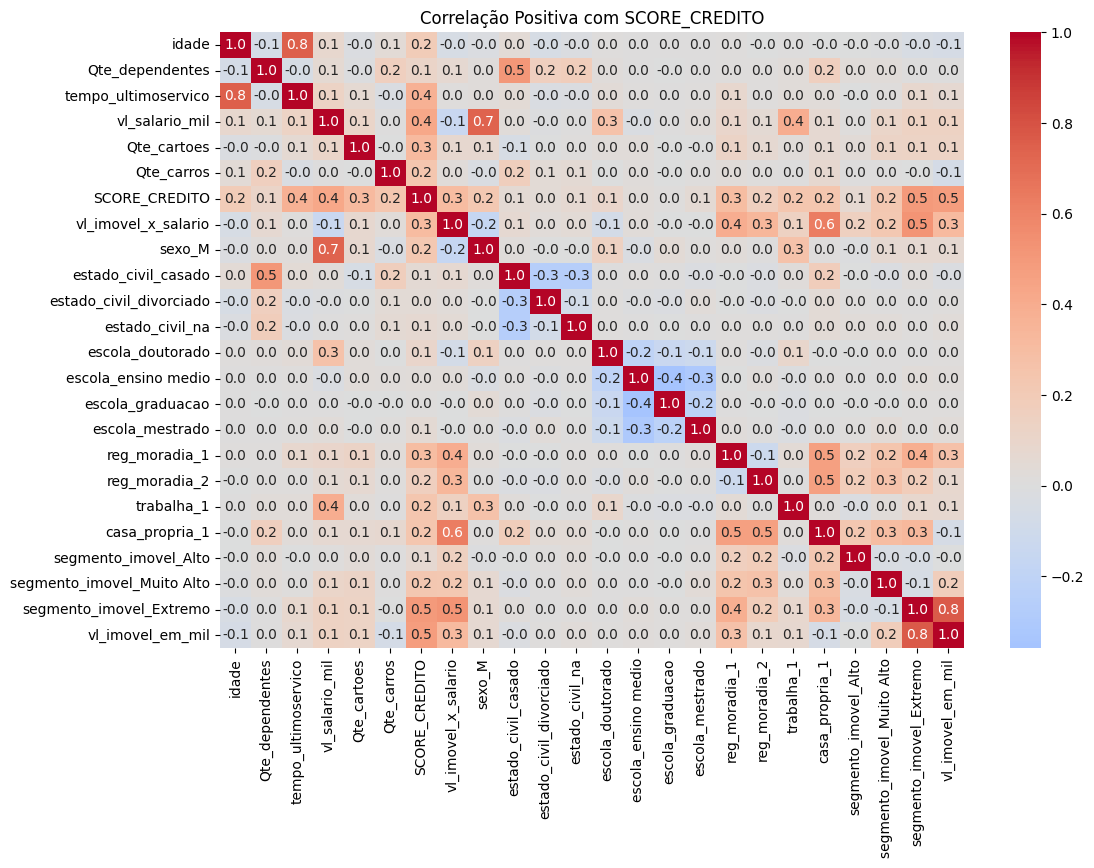

In [34]:
# avaliando as correlações positivas

# calculando a matriz de correlação
corr = treino_tratado.corr()

# selecionando as colunas com correlação positiva em relação a SCORE_CREDITO
corr_score_positivo = corr['SCORE_CREDITO'][corr['SCORE_CREDITO'] > 0].index

# filtrando o DataFrame com essas colunas
treino_tratado_corr_pos = treino_tratado[corr_score_positivo]

# recalculando a matriz de correlação apenas com essas colunas
corr_pos = treino_tratado_corr_pos.corr().round(3)

# ajustando o tamanho da figura
plt.figure(figsize=(12, 8))

# criando a heatmap
sns.heatmap(corr_pos, annot=True, cmap='coolwarm', center=0, fmt='.1f', annot_kws={"size": 10})

# adicionando título
plt.title('Correlação Positiva com SCORE_CREDITO')

# mostrando a figura
plt.show()

Análise das Correlações Mais Positivas:

- **vl_imovel_x_salario (0.6):**
Uma alta correlação positiva (0.6) indica que, quanto maior o valor do imóvel em relação ao salário, maior tende a ser o score de crédito. Isso sugere que a posse de imóveis de alto valor, proporcionalmente ao salário, está associada a melhores scores de crédito.

- **segmento_imovel_Alto (0.5):**
A pertença ao segmento de imóveis de valor alto tem uma correlação positiva significativa com o score de crédito. Isso implica que indivíduos que possuem imóveis neste segmento tendem a ter um score de crédito mais alto.

- **segmento_imovel_Muito Alto (0.5):**
Similar ao segmento_imovel_Alto, este segmento também mostra uma forte correlação positiva com o score de crédito, indicando que a posse de imóveis de valor muito alto está associada a um score de crédito superior.

- **segmento_imovel_Extremo (0.5):**
Indivíduos que possuem imóveis no segmento extremo também tendem a ter scores de crédito mais altos, conforme indicado pela correlação positiva de 0.5.

- **vl_imovel_em_mil (0.3):**
Embora a correlação seja mais moderada (0.3), ainda assim há uma relação positiva entre o valor absoluto dos imóveis e o score de crédito. Isso sugere que imóveis de maior valor estão associados a melhores scores de crédito.

**Considerações:** Essas correlações indicam que variáveis relacionadas ao valor e segmento dos imóveis têm um impacto significativo no **SCORE_CREDITO**. Indivíduos com imóveis de maior valor ou pertencentes a segmentos de imóveis de alto valor tendem a ter scores de crédito mais altos.

# 3)  Realize um exercício para prever/inferir esta com base em combinação de variáveis diferentes.
Experimente também com diversos tipos de algoritmos. Para todos eles, mensure a assertividade tanto nos dados de treino quanto de teste. Discorra sobre esses resultados


In [35]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True)
}

In [36]:
def test_ml_models(X_treino,X_teste, y_treino ,y_teste , models, metrics=None, scale_data=False):

    if metrics is None:
        metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']


    # Eecalando os dados, se necessário
    if scale_data:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_treino)
        X_test = scaler.transform(X_teste)

    # dicionário para armazenar os resultados
    results = []

    # loop pelos modelos
    for name, model in models.items():
        model.fit(X_train, y_treino)  # treina o modelo
        y_pred = model.predict(X_test)  # faz previsões

        # calcula métricas
        result = {'Model': name}
        if 'accuracy' in metrics:
            result['Accuracy'] = accuracy_score(y_teste, y_pred)
        if 'precision' in metrics:
            result['Precision'] = precision_score(y_teste, y_pred, average='binary', zero_division=0)
        if 'recall' in metrics:
            result['Recall'] = recall_score(y_teste, y_pred, average='binary', zero_division=0)
        if 'f1' in metrics:
            result['F1'] = f1_score(y_teste, y_pred, average='binary', zero_division=0)
        if 'roc_auc' in metrics and hasattr(model, 'predict_proba'):
            y_proba = model.predict_proba(X_test)[:, 1]
            result['ROC AUC'] = roc_auc_score(y_teste, y_proba)

        results.append(result)

    # retorna os resultados como DF
    return pd.DataFrame(results)

In [37]:
y_treino = treino_tratado['SCORE_CREDITO']
y_teste = teste_tratado['SCORE_CREDITO']

In [38]:
 X_teste = teste_tratado[['escola_doutorado','idade', 'Qte_dependentes', 'tempo_ultimoservico', 'vl_salario_mil',
       'Qte_cartoes', 'Qte_carros', 'vl_imovel_x_salario',
       'sexo_M', 'estado_civil_casado', 'estado_civil_divorciado',
       'estado_civil_na', 'escola_doutorado', 'escola_ensino medio',
       'escola_graduacao', 'escola_mestrado', 'reg_moradia_1', 'reg_moradia_2',
       'trabalha_1', 'casa_propria_1', 'segmento_imovel_Alto',
       'segmento_imovel_Muito Alto', 'segmento_imovel_Extremo',
       'vl_imovel_em_mil']]
 X_treino = treino_tratado[['escola_doutorado','idade', 'Qte_dependentes', 'tempo_ultimoservico', 'vl_salario_mil',
       'Qte_cartoes', 'Qte_carros', 'vl_imovel_x_salario',
       'sexo_M', 'estado_civil_casado', 'estado_civil_divorciado',
       'estado_civil_na', 'escola_doutorado', 'escola_ensino medio',
       'escola_graduacao', 'escola_mestrado', 'reg_moradia_1', 'reg_moradia_2',
       'trabalha_1', 'casa_propria_1', 'segmento_imovel_Alto',
       'segmento_imovel_Muito Alto', 'segmento_imovel_Extremo',
       'vl_imovel_em_mil']]

In [39]:
def test_ml_models(X_treino, X_teste, y_treino, y_teste, models, metrics=['mse', 'r2', 'accuracy'], scale_data=False):
    resultados = {}

    # loop pelos modelos
    for name, model in models.items():
        model.fit(X_treino, y_treino)  # treina o modelo
        y_pred = model.predict(X_teste)  # faz previsões

        # calcular métricas baseadas no tipo de problema
        resultado = {}
        if isinstance(model, (RandomForestRegressor)):
            if 'mse' in metrics:
                resultado['mse'] = mean_squared_error(y_teste, y_pred)
            if 'r2' in metrics:
                resultado['r2'] = r2_score(y_teste, y_pred)
        elif isinstance(model, (RandomForestClassifier, LogisticRegression, SVC)):
            if 'accuracy' in metrics:
                resultado['accuracy'] = accuracy_score(y_teste, y_pred)

        resultados[name] = resultado

    return resultados

# exemplo de chamada da função
from sklearn.model_selection import train_test_split

# definir as variáveis
X_teste = teste_tratado[['escola_doutorado','idade', 'Qte_dependentes', 'tempo_ultimoservico', 'vl_salario_mil',
       'Qte_cartoes', 'Qte_carros', 'vl_imovel_x_salario',
       'sexo_M', 'estado_civil_casado', 'estado_civil_divorciado',
       'estado_civil_na', 'escola_doutorado', 'escola_ensino medio',
       'escola_graduacao', 'escola_mestrado', 'reg_moradia_1', 'reg_moradia_2',
       'trabalha_1', 'casa_propria_1', 'segmento_imovel_Alto',
       'segmento_imovel_Muito Alto', 'segmento_imovel_Extremo',
       'vl_imovel_em_mil']]
X_treino = treino_tratado[['escola_doutorado','idade', 'Qte_dependentes', 'tempo_ultimoservico', 'vl_salario_mil',
       'Qte_cartoes', 'Qte_carros', 'vl_imovel_x_salario',
       'sexo_M', 'estado_civil_casado', 'estado_civil_divorciado',
       'estado_civil_na', 'escola_doutorado', 'escola_ensino medio',
       'escola_graduacao', 'escola_mestrado', 'reg_moradia_1', 'reg_moradia_2',
       'trabalha_1', 'casa_propria_1', 'segmento_imovel_Alto',
       'segmento_imovel_Muito Alto', 'segmento_imovel_Extremo',
       'vl_imovel_em_mil']]

# assumir que SCORE_CREDITO é uma variável contínua para Regressão
y_teste_reg = teste_tratado['SCORE_CREDITO']
y_treino_reg = treino_tratado['SCORE_CREDITO']

# transformar SCORE_CREDITO para binário para classificação (ex.: acima de uma mediana)
threshold = treino_tratado['SCORE_CREDITO'].median()
y_teste_clf = (teste_tratado['SCORE_CREDITO'] > threshold).astype(int)
y_treino_clf = (treino_tratado['SCORE_CREDITO'] > threshold).astype(int)

# modelos de exemplo
models = {
    'Random Forest (Regressor)': RandomForestRegressor(),
    'Random Forest (Classifier)': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC()
}

# testar modelos de Regressão
resultados_reg = test_ml_models(X_treino, X_teste, y_treino_reg, y_teste_reg,
                                {'Random Forest (Regressor)': models['Random Forest (Regressor)']})
print("Resultados de Regressão:", resultados_reg)

# testar modelos de Classificação
resultados_clf = test_ml_models(X_treino, X_teste, y_treino_clf, y_teste_clf,
                                {k: v for k, v in models.items() if k != 'Random Forest (Regressor)'})
print("Resultados de Classificação:", resultados_clf)


Resultados de Regressão: {'Random Forest (Regressor)': {'mse': 508.69856805385814, 'r2': 0.9714041006135368}}
Resultados de Classificação: {'Random Forest (Classifier)': {'accuracy': 1.0}, 'Logistic Regression': {'accuracy': 0.7222152769096137}, 'SVM': {'accuracy': 0.6890861357669709}}


Para a combinação de variáveis:

['escola_doutorado','idade', 'Qte_dependentes', 'tempo_ultimoservico', 'vl_salario_mil',
       'Qte_cartoes', 'Qte_carros', 'vl_imovel_x_salario',
       'sexo_M', 'estado_civil_casado', 'estado_civil_divorciado',
       'estado_civil_na', 'escola_doutorado', 'escola_ensino medio',
       'escola_graduacao', 'escola_mestrado', 'reg_moradia_1', 'reg_moradia_2',
       'trabalha_1', 'casa_propria_1', 'segmento_imovel_Alto',
       'segmento_imovel_Muito Alto', 'segmento_imovel_Extremo',
       'vl_imovel_em_mil']

Os resultados são:
Regressão:
- **Random Forest (Regressor):** mse: 501.187 e r2: 0.971

Classificação:
- **Random Forest (Classifier):** accuracy: 1.0
- **Logistic Regression: accuracy:** 0.722
- **SVM:** accuracy: 0.689

**Random Forest (Classifier)**: A acurácia de 1.0 (ou 100%) é excepcionalmente alta. No entanto, é importante verificar se há overfitting, onde o modelo pode ter se ajustado muito bem aos dados de treino, mas pode não generalizar bem para novos dados. Análises adicionais como cross-validation podem ajudar a verificar a robustez do modelo.
**Logistic Regression:** Uma acurácia de 72.22% é razoável para muitos problemas de classificação, especialmente se os dados forem desbalanceados ou complexos.

**SVM:** A acurácia de 68.91% é um pouco inferior à da regressão logística, mas ainda pode ser adequada dependendo do contexto e das expectativas do problema.

**Considerações:** Para o modelo de regressão, o Random Forest Regressor apresentou um desempenho muito bom com um R² alto, embora o MSE precise ser interpretado no contexto dos dados. Para os modelos de classificação, o Random Forest Classifier mostrou uma acurácia perfeita, mas isso pode indicar overfitting. A Logistic Regression e o SVM apresentaram resultados bons, com a regressão logística superando o SVM ligeiramente.


In [40]:
# alternando variáveis

# definir as variáveis
X_teste = teste_tratado[['vl_imovel_x_salario', 'segmento_imovel_Alto', 'segmento_imovel_Muito Alto', 'segmento_imovel_Extremo', 'vl_imovel_em_mil']]
X_treino = treino_tratado[['vl_imovel_x_salario', 'segmento_imovel_Alto', 'segmento_imovel_Muito Alto', 'segmento_imovel_Extremo', 'vl_imovel_em_mil']]


# testar modelos de Regressão
resultados_reg = test_ml_models(X_treino, X_teste, y_treino_reg, y_teste_reg,
                                {'Random Forest (Regressor)': models['Random Forest (Regressor)']})
print("Resultados de Regressão:", resultados_reg)

# testar modelos de Classificação
resultados_clf = test_ml_models(X_treino, X_teste, y_treino_clf, y_teste_clf,
                                {k: v for k, v in models.items() if k != 'Random Forest (Regressor)'})
print("Resultados de Classificação:", resultados_clf)


Resultados de Regressão: {'Random Forest (Regressor)': {'mse': 8159.630647355565, 'r2': 0.5413158367731485}}
Resultados de Classificação: {'Random Forest (Classifier)': {'accuracy': 0.7424678084760595}, 'Logistic Regression': {'accuracy': 0.6157019627453432}, 'SVM': {'accuracy': 0.5925740717589699}}


Para a combinação de variáveis:

['vl_imovel_x_salario', 'segmento_imovel_Alto', 'segmento_imovel_Muito Alto', 'segmento_imovel_Extremo', 'vl_imovel_em_mil']

Resultados de Regressão:

- **Random Forest (Regressor):** MSE: 8161.155 e R²: 0.5412 MSE:
O MSE de 8161.156 indica a média da diferença quadrada entre os valores previstos pelo modelo e os valores reais. Esse valor sugere que ainda há uma quantidade considerável de erro nas previsões, o que pode ser aceitável dependendo da escala dos dados. R²: O R² de 0.5412 indica que 54.12% da variabilidade nos dados é explicada pelo modelo. Esse valor é moderado, sugerindo que o modelo de regressão da floresta aleatória tem uma capacidade razoável de explicar a variabilidade dos dados.

Resultados de Classificação:

- **Random Forest (Classifier):** Acurácia: 0.742. A acurácia de 74.25% é boa, indicando que o modelo está performando bem na maioria dos casos. No entanto, é importante verificar se há overfitting.

- **Logistic Regression:** Accuracy: 0.615. Uma acurácia de 61.57% é razoável para muitos problemas de classificação, especialmente se os dados forem desbalanceados ou complexos.

- **SVM:** Accuracy: 0.592. A acurácia de 59.26% é um pouco inferior à da regressão logística, mas ainda pode ser adequada dependendo do contexto e das expectativas do problema.

**Considerações:**
Para o modelo de regressão, o Random Forest Regressor apresentou um desempenho moderado com um R² razoável, embora o MSE precise ser interpretado no contexto dos dados. Para os modelos de classificação, o Random Forest Classifier mostrou uma boa acurácia, mas é importante verificar a possibilidade de overfitting. A Logistic Regression e o SVM apresentaram resultados razoáveis, com a regressão logística superando o SVM ligeiramente.

**Comparação entre os dois testes:**

Para o modelo de regressão, o Random Forest Regressor mostrou um desempenho significativamente melhor nos resultados anteriores, com um MSE menor e um R² muito mais alto. Isso indica que o modelo anterior era mais eficaz na previsão dos dados.

Para os modelos de classificação, o Random Forest Classifier no resultado anterior apresentava uma acurácia perfeita (possivelmente devido a overfitting), enquanto o modelo atual tem uma acurácia mais moderada.
A Logistic Regression e o SVM tiveram uma performance inferior nos resultados atuais em comparação com os resultados anteriores, sugerindo que os ajustes ou os dados atuais são menos adequados para esses modelos.

	3) Não esqueça de apresentar suas análises/conclusões de negócio ao decorrer de todo trabalho